<a href="https://colab.research.google.com/github/ajrianop/Estadistica_Descriptiva_y_Python_UD2023-3/blob/main/05_Modelos_de_regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Para plantear el modelo de regresión lineal utilizando Scikit Learn
from sklearn.linear_model import LinearRegression

# **Modelos de Regresión**

Los modelos de regresión son técnicas estadísticas que se utilizan para analizar la relación entre una variable dependiente (o respuesta $Y$ o $y$
) y una o más variables independientes (o predictores, también llamados regresores $x$ o $x_i$). Estos modelos son fundamentales en estadística y aprendizaje automático para predecir valores y entender las relaciones entre variables. Algunos de los modelos de regresión más comunes incluyen:

* **Regresión Lineal Simple:** Es el modelo más básico y se utiliza cuando hay una relación lineal entre la variable dependiente y una variable independiente. La ecuación de regresión lineal simple tiene la forma:

$$y=b_0 + b_1 x,$$
donde $b_0$ es el intercepto en el eje $y$ y $b_1$ es la pendiente.

* **Regresión Lineal Múltiple:** Se utiliza cuando hay más de una variable independiente. La ecuación de regresión lineal múltiple tiene la forma:
$$y = b_0 + b_1 x_1 + b_2 x_2 + \ldots + b_n x_n,$$

donde $b_0$ es el intercepto en el eje $y$ y $b_1, \ldots , b_n$ son los coeficientes que determinan el crecimiento de cada variables.

* **Regresión Polinómica:** Se utiliza cuando la relación entre las variables parece ser no lineal. La regresión polinómica puede ajustarse a una relación de grado $n$, como por ejemplo:
$$y = b_0 + b_1 x + b_2 x^2 + \ldots + b_n x^n.$$
* **Regresión Logística:** Se utiliza cuando la variable dependiente es categórica y binaria (es decir, tiene dos clases). La regresión logística utiliza la función logística para modelar la probabilidad de que la variable dependiente pertenezca a una de las dos clases.

* **Regresión de Poisson:** Se utiliza cuando la variable dependiente representa el número de eventos que ocurren en un intervalo de tiempo o en un área espacial fija. La regresión de Poisson modela variables de conteo y utiliza la distribución de Poisson para modelar la relación.

* **Regresión Ridge y Lasso:** Son extensiones de la regresión lineal que incorporan regularización para evitar el sobreajuste (overfitting) del modelo. Ridge y Lasso introducen términos de penalización en la función objetivo para controlar la complejidad del modelo.

* **Regresión de Mínimos Cuadrados Parciales (PLS):** Es útil cuando hay multicolinealidad (correlación alta entre las variables independientes). PLS encuentra componentes latentes que son combinaciones lineales de las variables originales para predecir la variable dependiente.

* **Regresión Bayesianas:** Utilizan métodos bayesianos para estimar los parámetros del modelo y proporcionar intervalos de confianza bayesianos para las predicciones.

Anteriormente planteamos algunos ejemplos de regresión, los cuales pueden ser utilizados de acuerdo a la naturaleza de los datos, y se pueden utilizar dependiendo del problema que se quiera resolver. Es importante entender las características de los datos y las suposiciones subyacentes de cada modelo para seleccionar el modelo de regresión más adecuado para el análisis.






Dado lo anterior, se tienen diferentes tipos de planteamiento de modelos. De esta manera vamos a dividir los modelos a revisar entre:

* **Modelos de regresión simple:** Se tienen una variable indepediente, explicativa o regresor $x$ y una variable dependiente $y$.

* **Modelos de regresión múltiple:** Se tienen varias variables independientes $x_1, \ldots, x_n$ y una variable dependiente $y$.

Y entre estos modelos podemos hablar de modelos lineales y no lineales.

## **Modelo de regresión lineal simple (RLS) (Simple Linear Regression SLR)**

Dada una colección de datos, se busca determinar si estos siguen alguna tendencia específica. Para lograrlo, se proponen modelos que describan el comportamiento de estos datos. Comenzamos utilizando modelos que simplifican estructuras más complejas, conocidos como modelos lineales.

Cuando nos adentramos en el análisis de regresión, estamos tratando con relaciones en las que las variables no son deterministas, es decir, no proporcionan valores exactos. En el transcurso de este capítulo, nos encontraremos con ecuaciones que contienen un componente aleatorio, lo cual implica que durante el análisis estaremos lidiando con la incertidumbre inherente a estas relaciones.

El modelo de regresión lineal simple, se describe mediante la relación:
$$ y = \beta_0 + \beta_1 x + \epsilon,$$
donde $x$ es el regresor, $y$ el resultado y $\epsilon$ el error aleatorio.

Dado que nosotros queremos predecir la tendencia a partir de los valores de $x,$ es importante encontrar los valores de los coeficientes de regresión $b_0$ y  $b_1.$ Para encontrarlos utilizaremos la recta de **regresión ajustada** $$\hat{y} = b_0 + b_1 x,$$
donde $\hat{y}$ es el valor pronosticado o ajustado.




### **Método mínimos cuadrados y el modelo ajustado**

Para comenzar es importante definir el concepto de **residual**, el cual es un error en el ajuste del modelo y el cual notaremos como $e_i.$ De este modo, dado un conjunto de datos $(x_i,y_i)$ con $i= 1,\ldots , n$ y el modelo ajustado $\hat{y} = b_0 + b_1 x.$ Definimos como el residual $i$-ésimo como $$e_i = y_i - \hat{y_i}, \quad i=1, \ldots, n.$$

Para calcular $b_0$ y $b_1$ de tal manera que los cuadrados residuales sea mínimo. Para esto consideramos como la suma de cuadrados residuales (Residual Sum of Squares) como
$RSS = \sum \limits_{i=1}^{n} e_i^2 =\sum \limits_{i=1}^{n} (y_i - \hat{y_i})^2 = \sum \limits_{i=1}^{n} (y_i - b_0 - b_1 x_i )^2.$
Calculando las derivadas parciales con respecto a $b_0$ y $b_1$,
$$RSS_{b_0}=\frac{\partial RSS}{\partial b_0} = -2\sum \limits_{i=1}^{n} (y_i - b_0 - b_1 x_i ),$$
$$RSS_{b_1}=\frac{\partial RSS}{\partial b_1} = -2\sum \limits_{i=1}^{n} (y_i - b_0 - b_1 x_i )x_i.$$

De este modo al igualar a cero ambas derivadas parciales, queremos encontrar los puntos críticos de la función para poder determinar donde el error es mínimo (solucionamos un problema de optimización de varias variables) $$RSS_{b_0} = 0 , RSS_{b_1} = 0.$$

De este modo encontramos el sistema ecuaciones normales del problema

$$\sum \limits_{i=1}^{n} y_i  = n b_0 + \sum \limits_{i=1}^{n}b_1 x_i,$$
$$\sum \limits_{i=1}^{n} y_ix_i =  b_0 \sum \limits_{i=1}^{n} x_i + b_1 \sum \limits_{i=1}^{n} x_i ^2.$$

Por lo tanto los valores estimados para $b_0$ y  $b_1$ son:

$$b_1 = \frac{n \sum \limits_{i=1}^{n}x_iy_i - \left(\sum \limits_{i=1}^{n} x_i \right) \left(\sum \limits_{i=1}^{n} y_i \right)}{ n \sum \limits_{i=1}^{n} x_i^2 - \left(\sum \limits_{i=1}^{n} x_i\right)^2}= \frac{\sum \limits_{i=1}^{n} (x_i -\bar{x})(y_i - \bar{y})}{\sum \limits_{i=1}^{n} (x_i -\bar{x})^2},$$
$$b_0 = \frac{\sum \limits_{i=1}^{n}y_i - b_1 \sum \limits_{i=1}^{n}x_i}{n} = \bar{y}-b_1\bar{x}.$$

### **Ejemplo**

 Supongamos se tiene un conjunto de datos que contiene el costo de construcción (en miles de dólares) y el área de construcción (en metros cuadrados) para varios proyectos de construcción.

| Costo de Construcción (miles de dólares) | Área de Construcción (m²) |
|------------------------------------------|--------------------------|
| 150                                      | 100                      |
| 200                                      | 120                      |
| 180                                      | 110                      |
| 250                                      | 150                      |
| 280                                      | 160                      |
| 300                                      | 180                      |
| 320                                      | 200                      |
| 350                                      | 210                      |
| 400                                      | 230                      |
| 420                                      | 250                      |



In [ ]:
def grafica_regresion_lineal(datosX, datosY, b0 , b1 , tipo_regresion , descripcion_ejex, descripcion_ejey , leyenda):

  # Se generan los valores del eje x
  x = np.linspace(min(datosX)-(0.05 * len(datosX)), max(datosX)+ (0.05 * len(datosX)), 10)

  # Calculo de la ecuación y = b0 + b1 * x
  y = b0 + b1 * x

  # Grafica linea recta
  plt.figure(figsize=(8, 6))
  plt.plot(x, y, color='red', label = tipo_regresion)
  plt.xlabel('x')
  plt.ylabel('y')

  # Grafica de puntos datos para area_construccion
  plt.scatter(datosX , datosY , label='Datos Originales')
  plt.xlabel(descripcion_ejex)
  plt.ylabel(descripcion_ejey)

  # Leyenda
  plt.legend()
  plt.title(leyenda)

  plt.grid(True)
  plt.legend()
  plt.show()

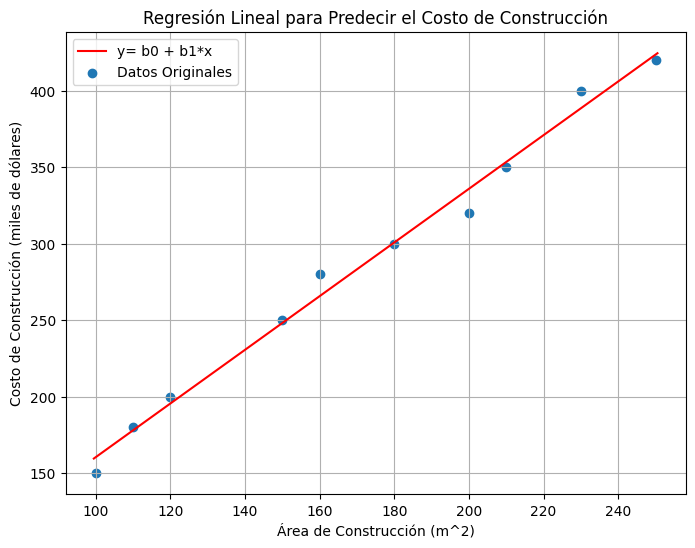

Coeficiente (pendiente): 1.7538397675383977
Intercepto: -14.906600249066003
El costo de producción para un área de construcción 300 (m^2) es 511.2453300124533


In [ ]:
# Datos de ejemplo: costo de construcción (en miles de dólares) y área de construcción (en metros cuadrados)
# valores de x
area_construccion = [100, 120, 110, 150, 160, 180, 200, 210, 230, 250]
# valores de y
costo_construccion = [150, 200, 180, 250, 280, 300, 320, 350, 400, 420]

# Calculo de los coeficientes b_0 y b_1
xmedia = sum(area_construccion)/len(area_construccion)
ymedia = sum(costo_construccion)/len(costo_construccion)
b1 = (sum([(x - xmedia)*(y - ymedia) for x,y in zip(area_construccion , costo_construccion)])) / (sum([ (x - xmedia)**2 for x in area_construccion]))
b0 = ymedia - b1 * xmedia
'''
TAREA: Escribir una función que calcule los coeficientes b0 y b1 solo ingresando X (variable independiente) y Y(variable dependiente).
'''
# Parametros para graficar
datosX = area_construccion
datosY = costo_construccion
tipo_regresion = 'y= b0 + b1*x'
descripcion_ejex = 'Área de Construcción (m^2)'
descripcion_ejey = 'Costo de Construcción (miles de dólares)'
leyenda = 'Regresión Lineal para Predecir el Costo de Construcción'

grafica_regresion_lineal(datosX, datosY, b0 , b1 , tipo_regresion , descripcion_ejex, descripcion_ejey , leyenda)

# Mostrar los coeficientes del modelo manual
print('Coeficiente (pendiente):', b1)
print('Intercepto:', b0)

#Predicción si el area de construccion es K
#k = float(input('Ingrese el área de construcción (en m^2) a predecir costo: '))
k = 300
prediccion = b0 + b1 * k
print(f'El costo de producción para un área de construcción {k} (m^2) es {prediccion}')

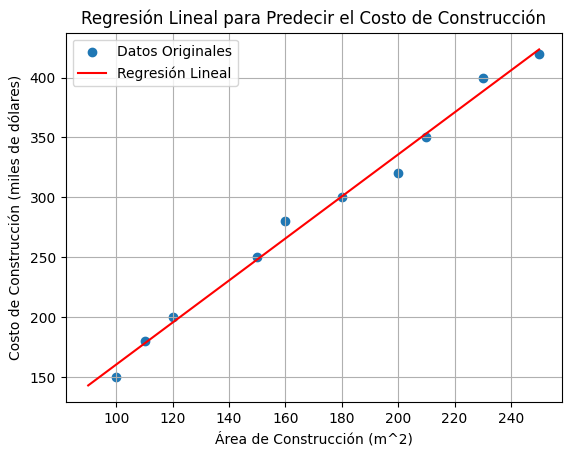

Coeficiente (pendiente): 1.7538397675383972
Intercepto: -14.906600249065946
El costo de producción para un área de construcción 300 (m^2) es 511.2453300124532


In [ ]:
'''
# Utilizando librerías de Python (scikit learn)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
'''
# Datos de ejemplo: costo de construcción (en miles de dólares) y área de construcción (en metros cuadrados)
costo_construccion = np.array([150, 200, 180, 250, 280, 300, 320, 350, 400, 420])
area_construccion = np.array([100, 120, 110, 150, 160, 180, 200, 210, 230, 250])

# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(area_construccion.reshape(-1, 1), costo_construccion)

# Realizar predicciones para diferentes áreas de construcción
areas_prediccion = np.array([90 , 110 , 130 , 140 , 170 , 250]).reshape(-1, 1)
costos_prediccion = modelo.predict(areas_prediccion)

# Graficar los datos originales y la regresión lineal
plt.scatter(area_construccion, costo_construccion, label='Datos Originales')
plt.plot(areas_prediccion, costos_prediccion, color='red', label='Regresión Lineal')
plt.xlabel('Área de Construcción (m^2)')
plt.ylabel('Costo de Construcción (miles de dólares)')
plt.legend()
plt.title('Regresión Lineal para Predecir el Costo de Construcción')
plt.grid(True)
plt.show()

# Mostrar los coeficientes del modelo
print('Coeficiente (pendiente):', modelo.coef_[0])
print('Intercepto:', modelo.intercept_)

#Predicción si el area de construccion es K
#k_modelo = float(input('Ingrese el área de construcción (en m^2) a predecir costo: '))
k_modelo = 300
prediccion_modelo = modelo.predict([[k]])
print(f'El costo de producción para un área de construcción {k} (m^2) es {prediccion_modelo[0]}')


El modelo de regresión lineal simple hace varias suposiciones para ser válido y producir estimaciones y predicciones precisas. Aquí están los supuestos clave del modelo de regresión lineal simple:

* Linealidad: La relación entre la variable dependiente (Y) y la variable independiente (X) es lineal. Esto significa que los cambios en Y son proporcionales a los cambios en X, y la relación se puede representar mediante una línea recta.

* Independencia: Las observaciones son independientes entre sí. Esto significa que el valor de la variable dependiente para una observación particular no está influenciado por el valor de la variable dependiente en otras observaciones.

* Homocedasticidad: La variabilidad de los errores (residuos) es constante en todos los niveles de la variable independiente. En otras palabras, la dispersión de los errores es constante a lo largo de la línea de regresión.

* Normalidad: Los errores (residuos) están distribuidos normalmente. Aunque este supuesto no es necesario para todas las inferencias y predicciones, es importante cuando se realizan pruebas de hipótesis o intervalos de confianza para los coeficientes del modelo.

* No colinealidad: En el contexto de la regresión múltiple, las variables independientes no deben estar altamente correlacionadas entre sí. La colinealidad puede dificultar la interpretación de los coeficientes y hacer que las estimaciones sean inestables.

* Ausencia de errores de medición: Los valores de las variables independientes y dependientes deben ser medidos con precisión y sin errores significativos. Errores de medición pueden introducir sesgo en las estimaciones.

* Ausencia de multicolinealidad perfecta: En el caso de regresión lineal simple, no puede haber multicolinealidad perfecta, es decir, la variable independiente no puede tener cero de variación. En el caso de regresión múltiple, no debe haber multicolinealidad perfecta entre las variables independientes.

Es importante tener en cuenta estos supuestos al realizar un análisis de regresión lineal, ya que violaciones de estos supuestos pueden afectar la validez y confiabilidad de las estimaciones y predicciones del modelo.

**Tarea**
Un profesor está interesado en determinar si existe una relación entre las horas de estudio semanal de sus estudiantes y las calificaciones obtenidas en un curso específico. Para ello, recopiló datos de 12 estudiantes, registrando las horas de estudio semanal y las calificaciones obtenidas en el curso.

|X (Horas de estudio)  |  Y (Calificación)|
|--------------------|--------------------|
|  5           |               70   |
|  6           |               75   |
|  4           |               65   |
|  7           |               80   |
|  9           |               85   |
|  8           |               82   |
|  6           |               76   |
|  3           |               60   |
| 10           |               88   |
|  5           |               72   |
|  7           |               78   |
|  8           |               81   |

1. ¿Existe una relación lineal entre las horas de estudio y las calificaciones?
2. Si la relación es lineal, ¿cuál es la ecuación de la recta de regresión?
3. Si un estudiante estudia 12 horas a la semana, ¿qué calificación se puede esperar que obtenga según el modelo de regresión lineal?
4. (Al finalizar la unidad) ¿Cuál es el coeficiente de correlación entre las horas de estudio y las calificaciones?

### **Algunos modelos no lineales que se pueden transformar en modelos de regresión lineal**

Algunos de los modelos que se pueden plantear para describir los diferentes datos que nos proporcionen podrían llevarnos a diferentes descripciones que no sean del tipo tendencia lineal de acuerdo a las variables naturales del problema. De este modo, para algunos de estos modelos podemos hacer algunos ajustes algebraicos, para transformar el modelo en uno lineal con las variables transformadas. De este modo describiremos algunos de ellos:

**Modelo exponencial:** $y= \beta_0e^{\beta_1 x} \epsilon$ (modelo con error multiplicativo) donde utilizando la transformación vía el logaritmo natural tenemos $\ln(y) = \ln(\beta_0)+\beta1 x + \epsilon.$

**Modelo potencial:** $y= \beta_0x^{\beta_1} \epsilon$ (modelo con error multiplicativo) donde utilizando la transformación vía el logaritmo natural tenemos $\log(y) = \log(\beta_0)+\beta_1 \log(x) + \epsilon.$

Por lo anterior, consideramos un modelo lineal si los
parámetros a estimar aparecen de manera lineal en la ecuación, de este modo algunos ejemplos de modelos de regresión lineal son:

* **Modelo polinimial:** $$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_n x^n +\epsilon.$$
* **Modelo senoidal:** $$y =  \beta_0 + \beta_1 \sin x + \beta_2 \cos x  + \epsilon.$$
* **Logarítmica:** $$\ln y = \beta_0 + \beta_1 \ln x + \epsilon.$$
* **Semilogarítmica:** $$y = \beta_0 + \beta_1 \ln x + \epsilon.$$
* **Inversa:**  $$y = \beta_0 + \beta_1 \frac{1}{x} + \epsilon.$$


### **Ejemplo:**

Vamos a considerar un ejemplo tomado del libro probabilidad y estadistica para ingeniería (Sección 11.11 , probabilidad-y-estadistica-para-ingenier-walpole_8), de este modo consideremos la fabricación de productos comerciales de madera, para ello es importante revisar la relación que existe entre la densidad (variable independiente $x$) de un producto de madera y su rigidez (variable dependiente $y$). Considerando 30 tableros de aglomerado con densidades que varian entre $8-26\ \mathrm{lbrs/pie^3},$ se midio la rigidez en libras por pulgada cuadrada.

In [ ]:
import pandas as pd
import numpy as np

densidad = [9.50 , 9.80 , 8.30 , 8.60 , 7 , 17.4 , 15.2 , 16.7  , 15 , 14.8 , 25.6 , 24.4 , 19.5 , 22.8 , 19.8 , 8.4 , 11, 9.9 , 6.4 , 8.2 , 15 , 16.4 , 15.4 , 14.5 , 13.6 , 23.4 , 23.3 , 21.2 , 21.7, 21.3]
rigidez = [14814 , 14007 , 7573 , 9714 ,5304 , 43243 , 28028 , 49499 , 26222 , 26751 , 96305 , 72594 , 32207 , 70453 , 38138 , 17502 , 19443 , 14191 , 8076 , 10728 , 25319 , 41792 , 25312 , 22148 , 18036 , 104170 , 49512 , 48218 , 47661 , 53045]

dicc = {'densidad' : densidad , 'rigidez' : rigidez}
df = pd.DataFrame(data = dicc)
df['densidad_log'] = np.log(df['densidad'])
df['rigidez_log'] = np.log(df['rigidez'])
df

,densidad,rigidez,densidad_log,rigidez_log
0,9.5,14814,2.251292,9.603328
1,9.8,14007,2.282382,9.547312
2,8.3,7573,2.116256,8.932345
3,8.6,9714,2.151762,9.181323
4,7.0,5304,1.945910,8.576217
5,17.4,43243,2.856470,10.674591
6,15.2,28028,2.721295,10.240959
7,16.7,49499,2.815409,10.809708
8,15.0,26222,2.708050,10.174354
9,14.8,26751,2.694627,10.194327


In [ ]:
def grafica_distribucion_datos(datosX, datosY, descripcion_ejex, descripcion_ejey , leyenda):
  '''
  Permite graficar el diagrama de dispersión de los datos utilizando los parametros:
  datosX --> list : datos del eje x
  datosY --> list : datos del eje y
  descripcion_ejex --> str : descripción del eje x
  descripcion_ejey --> str : descripción del eje y
  leyenda --> str : leyenda para describir la gráfica
  '''
  # Grafica de puntos datos para area_construccion
  plt.scatter(datosX , datosY , label='Datos Originales')
  plt.xlabel(descripcion_ejex)
  plt.ylabel(descripcion_ejey)

  # Leyenda
  plt.legend()
  plt.title(leyenda)

  plt.grid(True)
  plt.legend()
  plt.show()

def regresion_lineal(datosX, datosY, tipo_regresion ,descripcion_ejex, descripcion_ejey , leyenda):
  '''
  regresión lineal utilizando los parametros:
  datosX --> list : datos del eje x
  datosY --> list : datos del eje y
  tipo_regresion --> str : descripción de la regresion y = b0 + b1*x
  descripcion_ejex --> str : descripción del eje x
  descripcion_ejey --> str : descripción del eje y
  leyenda --> str : leyenda para describir la gráfica
  '''
  # Calculo de los coeficientes b_0 y b_1
  xmedia = sum(datosX)/len(datosX)
  ymedia = sum(datosY)/len(datosY)
  b1 = (sum([(x - xmedia)*(y - ymedia) for x,y in zip(datosX , datosY)])) / (sum([ (x - xmedia)**2 for x in datosX]))
  b0 = ymedia - b1 * xmedia

  grafica_regresion_lineal(datosX, datosY, b0 , b1 , tipo_regresion , descripcion_ejex, descripcion_ejey , leyenda)

  # Mostrar los coeficientes del modelo manual
  print('Coeficiente (pendiente):', b1)
  print('Intercepto:', b0)
  '''
  #Predicción si el area de construccion es K
  k = float(input('Ingrese el área de construcción (en m^2) a predecir costo: '))
  prediccion = b0 + b1 * k
  print(f'El costo de producción para un área de construcción {k} (m^2) es {prediccion}')
  '''
  return b0 , b1


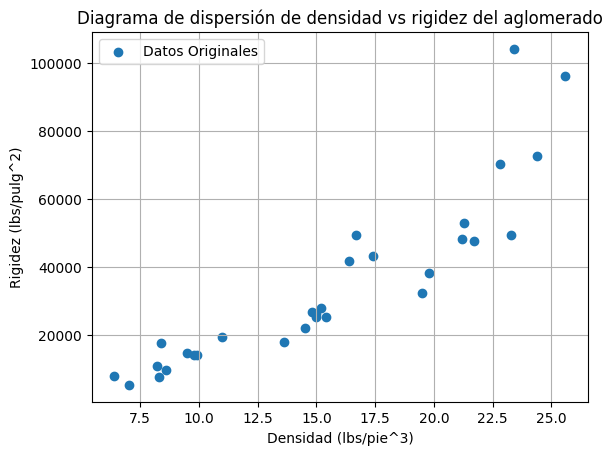

In [ ]:
# Parametros para graficar la dispersión de los datos iniciales
datosX = densidad
datosY = rigidez
descripcion_ejex = 'Densidad (lbs/pie^3)'
descripcion_ejey = 'Rigidez (lbs/pulg^2)'
leyenda = 'Diagrama de dispersión de densidad vs rigidez del aglomerado'
grafica_distribucion_datos(datosX, datosY, descripcion_ejex, descripcion_ejey , leyenda)

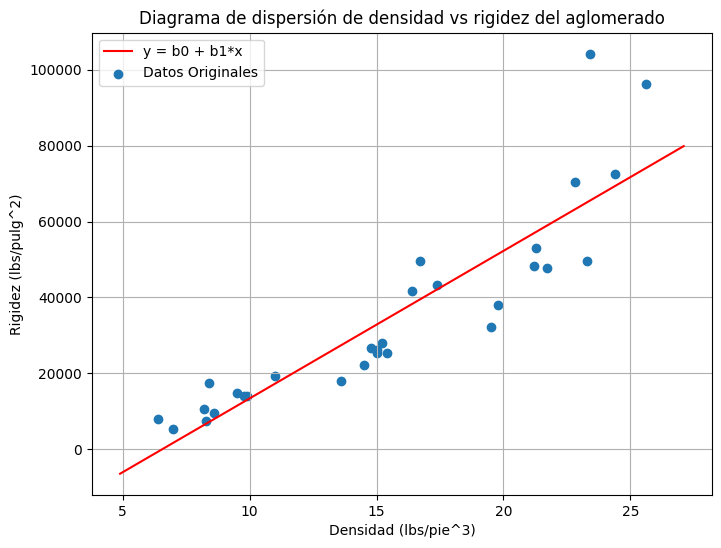

Coeficiente (pendiente): 3884.9755691659657
Intercepto: -25433.73872166415


(-25433.73872166415, 3884.9755691659657)

In [ ]:
# Aplicando el modelo de regresión lineal a los datos sin transformar
tipo_regresion = 'y = b0 + b1*x'
regresion_lineal(datosX, datosY, tipo_regresion, descripcion_ejex, descripcion_ejey , leyenda)

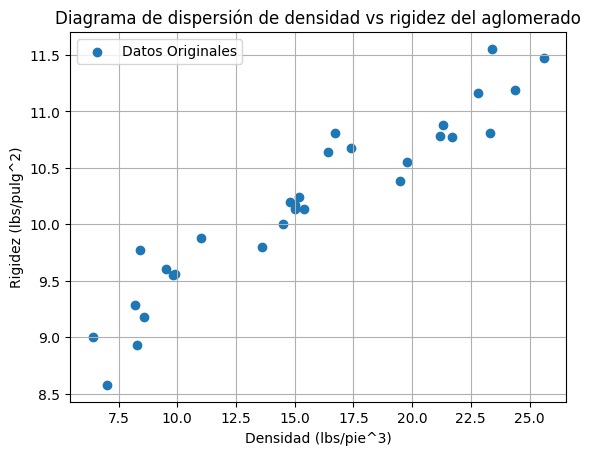

In [ ]:
# Parametros para graficar la dispersión de los datos iniciales
datosX = df['densidad']
datosY = df['rigidez_log']
descripcion_ejex = 'Densidad (lbs/pie^3)'
descripcion_ejey = 'Rigidez (lbs/pulg^2)'
leyenda = 'Diagrama de dispersión de densidad vs rigidez del aglomerado'
grafica_distribucion_datos(datosX, datosY, descripcion_ejex, descripcion_ejey , leyenda)

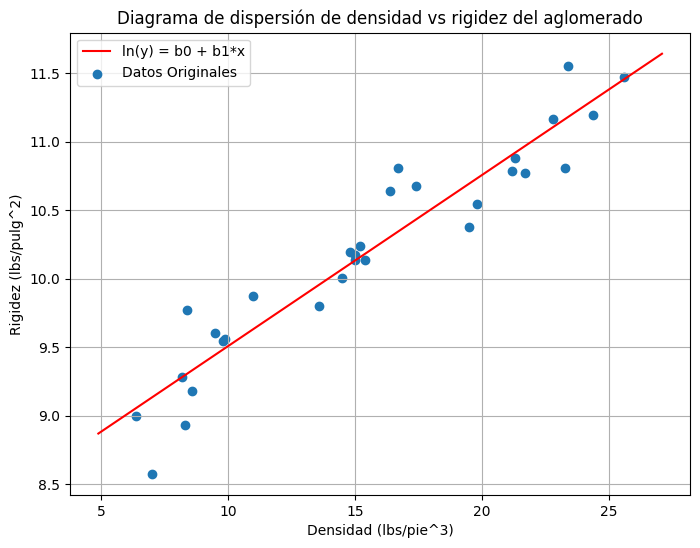

Coeficiente (pendiente): 0.12492291580733905
Intercepto: 8.257421095031873


(8.257421095031873, 0.12492291580733905)

In [ ]:
# Aplicando el modelo de regresión lineal a los datos transformados
datosY = df['rigidez_log'].tolist()
tipo_regresion = 'ln(y) = b0 + b1*x'
regresion_lineal(datosX, datosY, tipo_regresion , descripcion_ejex, descripcion_ejey , leyenda)

El anterior código de regresión lineal no es del todo correcto, este solo nos permite gráficar y solo nos indica los coeficientes del modelo. Lo ideal también seria que nos describiera los siguientes coeficientes:
* Correlación.
* Determinación.

## **Coeficiente de correlación y determinación**

El **coeficiente de correlación** es una medida estadística que describe la fuerza y dirección de una relación lineal entre dos variables. Indica como es el cambio de ambas variables. El coeficiente de correlación se denota como
$r$ y varía entre -1 y 1.

r=1: Correlación perfecta positiva. Significa que hay una relación lineal positiva perfecta entre las dos variables: cuando una aumenta, la otra también aumenta en proporción constante.

r=−1: Correlación perfecta negativa. Indica una relación lineal negativa perfecta: cuando una variable aumenta, la otra disminuye en proporción constante.

r=0: No hay correlación lineal. Indica que las dos variables no están relacionadas linealmente.

El coeficiente de correlación se calcula mediante la siguientes fórmulas:
$$r = \frac{\sum\limits_{i=1}^{n}(x_i-\bar{x})(y_i - \bar{y})}{\sqrt{\sum\limits_{i=1}^{n}(x_i - \bar{x})^2 \sum\limits_{i=1}^{n} (y_i-\bar{y})^2}},$$
$$r = b_1 \sqrt{\frac{\sum\limits_{i=1}^{n} (x_i - \bar{x})^2}{\sum\limits_{i=1}^{n} (y_i - \bar{y})^2}},$$
$$r = \frac{n\sum\limits_{i=1}^{n}x_iy_i - \sum\limits_{i=1}^{n} x_i \sum\limits_{i=1}^{n} y_i}{\sqrt{\left[n\sum\limits_{i=1}^{n} x_i ^2 - \left(\sum\limits_{i=1}^{n} x_i\right)^2\right]\left[n\sum\limits_{i=1}^{n} y_i ^2 - \left(\sum\limits_{i=1}^{n} y_i\right)^2\right]}}.$$



El **coeficiente de determinación**, denotado como $R^2$, es una medida estadística que indica la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes en un modelo de regresión. En otras palabras, $R^2$  representa la fracción de la variabilidad total en los datos de la variable dependiente que es explicada por el modelo de regresión.
El coeficiente de determinación puede tomar valores entre 0 y 1. Aquí está cómo se interpreta:

* $R^2 =0$: El modelo de regresión no explica ninguna variabilidad en los datos de la variable dependiente.
* $R^2 =1$: El modelo de regresión explica toda la variabilidad en los datos de la variable dependiente.

Las diferentes formulas para calcular el coeficiente de determinación estan dadas por:
$$R^2 = r^2,$$
$$R^2 = 1 - \frac{RSS}{TSS}$$

donde $RSS = \sum \limits_{i=1}^{n}(y_i - \hat{y_i})^2$ suma residual de cuadrados (Residual Sum of Squares) y $TSS = \sum \limits_{i=1}^{n}(y_i - \bar{y})^2$ suma total de los cuadrados corregida (Total Sum of Squares).

In [ ]:
# Tarea, calcular los coeficientes de correlación y determinación de los ejemplos anteriores.